In [48]:
from fair import emissions_driven
import pyam
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

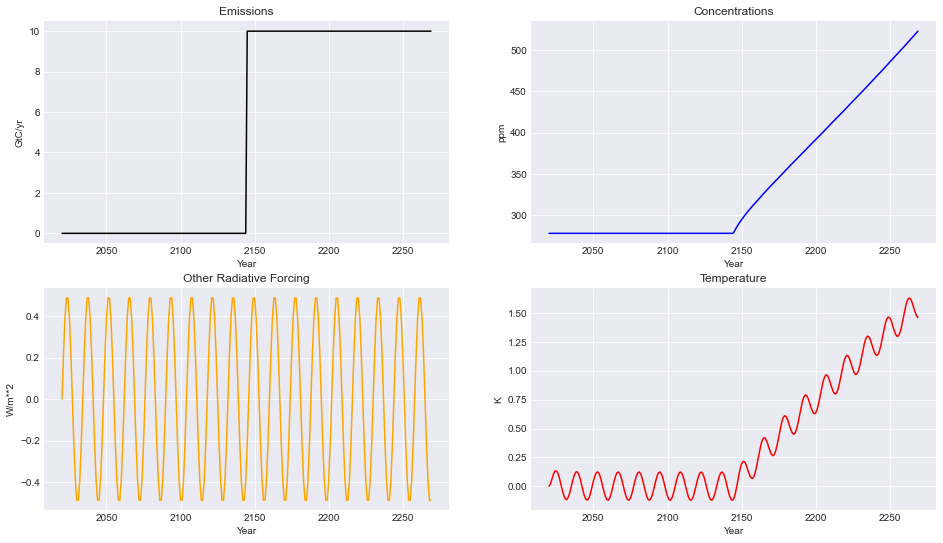

In [59]:
input_df = pd.DataFrame(
        [
            [
                "model_a",
                "scen_a",
                "World",
                "Emissions|CO2",
                "GtC/yr",
                *125*[0],
                *125*[10]
            ],
            [
                "model_a",
                "scen_a",
                "World",
                "Effective Radiative Forcing|Other",
                "W/m**2",
                *[0.5 * np.sin(2 * np.pi * (x) / 14.0) for x in range(250)]
            ],
        ],
        columns=pyam.IAMC_IDX + [*range(2020,2270)],
    )

pyam_inp_df = pyam.IamDataFrame(input_df)
cfg = {}

pyam_out_df = emissions_driven.run(pyam_inp_df, cfg)


pyam_emissions_df = pyam_out_df.filter(variable = 'Emissions|CO2')
pyam_concentrations_df = pyam_out_df.filter(variable = 'Atmospheric Concentrations|CO2')
pyam_other_forcing_df = pyam_out_df.filter(variable = 'Effective Radiative Forcing|Other')
pyam_temperature_df = pyam_out_df.filter(variable = 'Surface Temperature')

fig = plt.figure()
ax1 = fig.add_subplot(221)
pyam_emissions_df.line_plot(ax = ax1, title = 'Emissions', legend = False, color = 'black')
ax2 = fig.add_subplot(222)
pyam_concentrations_df.line_plot(ax = ax2, title = 'Concentrations', legend = False, color = 'blue')
ax3 = fig.add_subplot(223)
pyam_other_forcing_df.line_plot(ax = ax3, title = 'Other Radiative Forcing', legend = False, color = 'orange')
ax4 = fig.add_subplot(224)
pyam_temperature_df.line_plot(ax = ax4, title = 'Temperature', legend = False, color = 'red')